Projet GRP B11
SEARLE Oliver

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

In [ ]:
team_data = pd.read_csv('X_Train_Data/train_away_team_statistics_df.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'train_away_team_statistics_df.csv'

In [ ]:
print(team_data.describe())

                 ID  TEAM_SHOTS_TOTAL_season_sum  \
count  12303.000000                 12044.000000   
mean    6151.000000                     4.472351   
std     3551.714516                     2.885075   
min        0.000000                     0.000000   
25%     3075.500000                     2.000000   
50%     6151.000000                     4.000000   
75%     9226.500000                     6.000000   
max    12302.000000                    10.000000   

       TEAM_SHOTS_INSIDEBOX_season_sum  TEAM_SHOTS_OFF_TARGET_season_sum  \
count                     10917.000000                      12303.000000   
mean                          4.377943                          4.591238   
std                           2.933934                          2.806838   
min                           0.000000                          0.000000   
25%                           2.000000                          2.000000   
50%                           4.000000                          4.000000   

In [ ]:
# Étape 1 : Préparer les données
# Sélectionner uniquement les colonnes numériques pour le clustering
columns_to_drop = ["TEAM_NAME", "ID", "LEAGUE"]
team_data = team_data.drop(columns=columns_to_drop, axis=1)

numeric_data = team_data.select_dtypes(include=['float64', 'int64'])

# Gérer les valeurs manquantes (imputation avec la moyenne, par exemple)
numeric_data = numeric_data.fillna(numeric_data.mean())

In [ ]:
# Normalisation des données
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_data)

In [ ]:
# Étape 2 : Clustering avec K-Means
# Définir le nombre de clusters
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(scaled_data)

In [ ]:
# Ajouter les clusters au DataFrame original
team_data['Cluster'] = clusters

In [ ]:
# Étape 3 : Visualisation
# Réduction de dimensionnalité avec PCA pour visualisation en 2D
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)

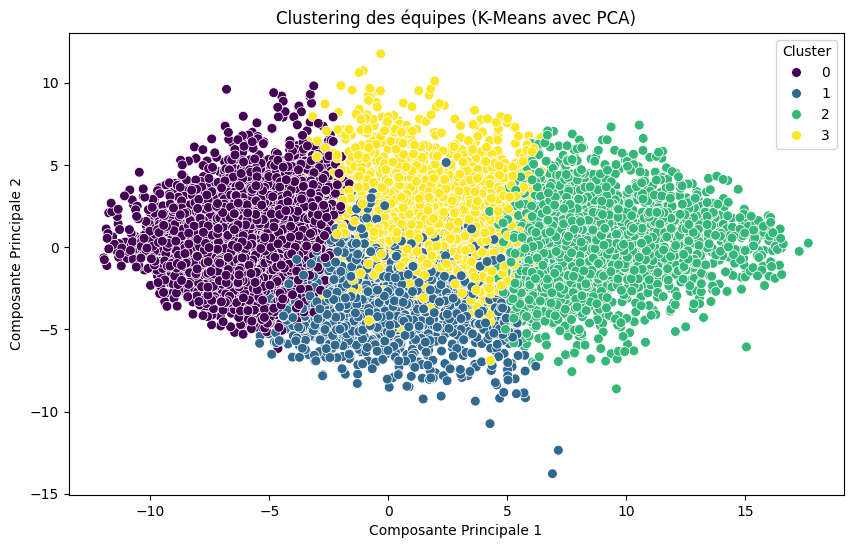

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=pca_data[:, 0], y=pca_data[:, 1], hue=clusters, palette='viridis', s=50)
plt.title('Clustering des équipes (K-Means avec PCA)')
plt.xlabel('Composante Principale 1')
plt.ylabel('Composante Principale 2')
plt.legend(title="Cluster")
plt.show()